In [1]:
import ipywidgets as widgets
import fastbook
fastbook.setup_book()
#hide
from fastbook import *

# Apprendre avec Fast AI

Cet article fait partie d'une série suivant mon apprentissage du Deep Learning avec fast.ai Suivez le cours vous aussi sur https://www.fast.ai/


Dès le deuxième cours, on vise à partager les résultats parce que développer un super algorithme que personne ne peut utiliser parce qu'il est caché sur mon PC, ce n'est pas très intéressant !

Alors dans le cours 2, on va :
1. Développer un modèle sur base de nos données
1. Exporter le modèle
1. Rendre ce modèle accessible à tous sur un site web gratuit

Allons-y !

Et si vous êtes intéressé mais que vous avez encore des questions, écrivez moi, je me ferai un plaisir de répondre à vos questions : jason.pettiaux@gmail.com

## Créer son premier modèle

Commençons par choisir un sujet pour mon premier projet.

Voilà mes idées:
* Classification de pelouse arrosée ou sèche
* Créateur de mail pour prendre des nouvelles d'amis
* Classification d'images de malaria infectées ou non infectées

Avant de lancer mon premier modèle, il faut que j'ai des données.



### Obtenir des données

On peut trouver des banques de données en ligne.

Voilà les sources de données auxquelles j'ai pensé:
* Pelouse : Je vais obtenir les images sur base de l'API de Bing Image (c'est pareil que Google Image)
* Mail : Mes derniers messages à des amis et en écrire une dizaine en plus
* Malaria : J'ai trouvé des datasets sur Kaggle, une plate-forme de compétition de Data Science, allez voir c'est super intéressant !

Pour ce premier projet, je commence par les pelouses !

In [2]:
# Je récupère la clé de l'API
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [3]:
# Je fais un test
results = search_images_bing(key, 'dry lawns')
ims = results.attrgot('content_url')
len(ims)

ErrorResponseException: Operation returned an invalid status code 'PermissionDenied'

In [ ]:
# J'enregistre l'images pour la visualiser
dest = 'images/dry_lawn.jpg'
download_url(ims[0], dest)

In [ ]:
# Je définis le nom du dossier et les différentes catégories que je vais investiguer
bear_types = 'dry',''
path = Path('lawns')

In [ ]:
# Je télécharge les images
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} lawns')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
# Je récupère les chemins d'accès
fns = get_image_files(path)
fns

In [ ]:
# Je revois les images 
failed = verify_images(fns)
failed

In [ ]:
#Je supprime les mauvaises
failed.map(Path.unlink);

### Charger les images pour le modèle

Un modèle de deep learning a des millions de paramètres comme nous l'avons dit. Donc pour les ajuster tous, cela prend beaucoup de temps. Pour faire cela plus rapidement, on fait l'optimisation en parallèle. Pour ce faire, on utilise un GPU (Graphical Processing Unit) qui est spécialisé dans les calculs en parallèle et on envoie les données par "batch" ou par lot en francais.

Par défaut, les lots de fast.ai sont de 64 images.

Avant d'envoyer ces données, il est nécessaire de les préparer et puis de les rassembler en lot qu'on enverra au GPU. 

Pour les préparer, fast.ai fournit les `DataBlock` et demandent quelques informations concernant le modèle:

* `blocks` : le type de données : dans notre cas, c'est des images d'une part et des catégories d'autre part, (pelouses sèches vs pelouses humides)
* `get_items`: le chemin d'accès des images : ici c'est grâce à la fonction `get_image_files`
* `splitter` : la division entre ensemble d'entraînement et de validation
* `get_y` : la définition des catégories ou de l'ensemble «cible», typiquement appelé y. Ici c'est le type de pelouse. Ici `parent_label` reprendra directement le nom du dossier parent.
* `item_tfms` : la méthode de transformation des images : En effet, pour que l'algorithme puisse travailler, il est nécessaire que toutes les images aient la même taille. Classiquement, on choisit de prendre une image carrée. On l'obtenir, on a plusieurs options, qu'on définira avec l'attribut `item_tfms` ici on choisit `Resize` qui va récupérer un carré au centre de l'image.

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

La création d'un `DataBlock` permet de créer des `DataLoaders` quand on fournit le dossier cible.

In [ ]:
dls = bears.dataloaders(path)

Maintenant qu'on a chargé les images, il faut encore vérifier qu'elles sont toujours pertinentes et qu'elles n'ont pas été rogné trop fort.

On peut faire cela avec la méthode `valid.show_batch`

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

## Exporter son premier modèle


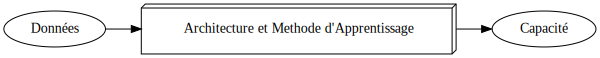

In [27]:
gv('''"Architecture et Methode d'Apprentissage"[shape=box3d width=1 height=0.7]
Données->"Architecture et Methode d'Apprentissage"-> Capacité''')